<a href="https://colab.research.google.com/github/ProsperChuks/preprocessing/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How scaling affects model predictions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

path = "/content/drive/MyDrive/Colab Notebooks/regression/K-Nearest Neighbors/drawndata1.csv"
dataF = pd.read_csv(path)
dataF.head(3)

,x,y,z
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a


In [2]:
x = dataF[['x', 'y']].values
y = dataF['z'] == 'a'

### checking different scalers

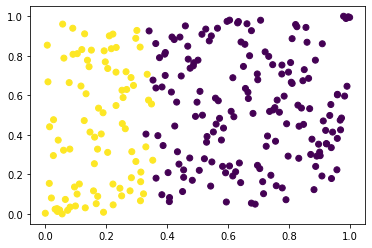

In [7]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer

new_x = QuantileTransformer(n_quantiles=100).fit_transform(x)
plt.scatter(new_x[:, 0], new_x[:, 1], c=y)

## handling the plotting

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

def plot_output(scaler):

  pipeline = Pipeline([
      ('scale', scaler),
      ('model', KNeighborsClassifier(n_neighbors=20, weights='distance'))
  ])

  pred = pipeline.fit(x, y).predict(x)

  plt.figure(figsize=(9, 3), dpi=140)
  plt.subplot(131)
  plt.scatter(x[:, 0], x[:, 1], c=y)
  plt.title('Actual Data')

  plt.subplot(132)
  trans_x = scaler.transform(x)
  plt.scatter(trans_x[:, 0], trans_x[:, 1], c=y)
  plt.title('Transformed Data')
  
  plt.subplot(133)
  new_xDF = np.concatenate([
                            np.random.uniform(0, x[:, 0].max(), (5000, 1)), 
                            np.random.uniform(0, x[:, 1].max(), (5000, 1))
  ], axis=1)
  y_prob = pipeline.predict_proba(new_xDF)
  plt.scatter(new_xDF[:, 0], new_xDF[:, 1], c=y_prob[:, 1], alpha=0.7)
  plt.title('Predicted Data')

### plotting with Standard Scaler

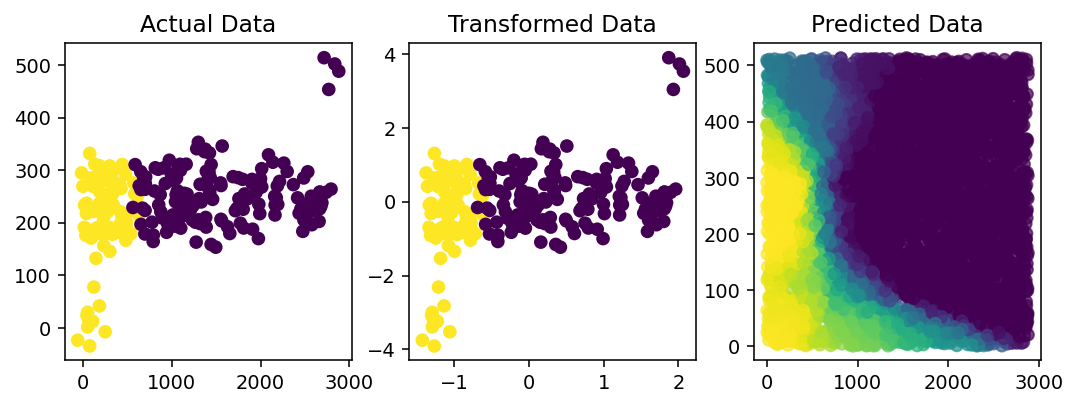

In [66]:
plot_output(StandardScaler())

### plotting with Quantile Transformer

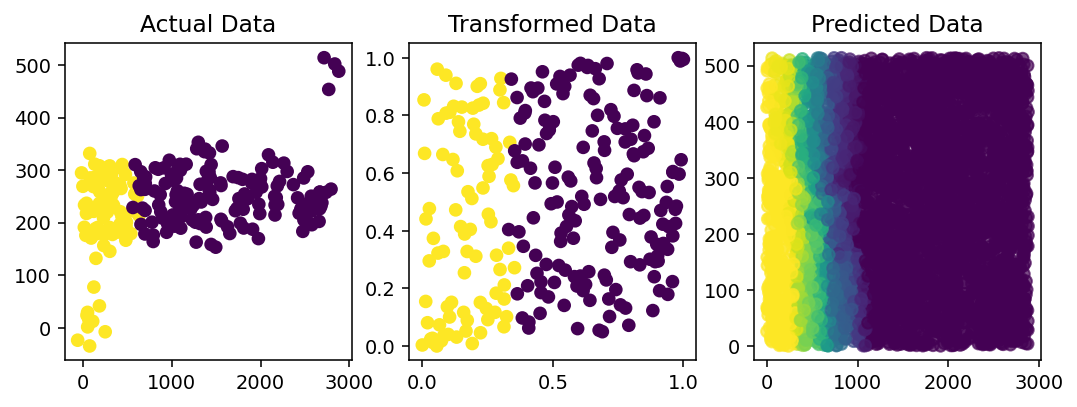

In [67]:
plot_output(QuantileTransformer(n_quantiles=100))